# Working with two or many Strategies (Combination)

## Introduction and Data

Measures to reduce Trading Costs:
- Busy Trading Hours
- The right Granularity
- Better/more complex Strategies with stronger Signals -> go/stay neutral if signals are weak

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
df = pd.read_csv("twenty_minutes.csv", parse_dates = ["time"], index_col = "time")
df

,EURUSD,GBPUSD,EURAUD
time,,,
2019-01-01 22:00:00+00:00,1.146320,1.274770,1.626290
2019-01-01 22:20:00+00:00,1.146455,1.274740,1.626695
2019-01-01 22:40:00+00:00,1.146410,1.273980,1.627340
2019-01-01 23:00:00+00:00,1.146670,1.275030,1.626540
2019-01-01 23:20:00+00:00,1.146630,1.275150,1.627450
...,...,...,...
2020-08-30 22:20:00+00:00,1.190970,1.334830,1.616940
2020-08-30 22:40:00+00:00,1.190860,1.334515,1.617120
2020-08-30 23:00:00+00:00,1.190690,1.334905,1.617360


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31026 entries, 2019-01-01 22:00:00+00:00 to 2020-08-30 23:40:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EURUSD  31017 non-null  float64
 1   GBPUSD  31024 non-null  float64
 2   EURAUD  31021 non-null  float64
dtypes: float64(3)
memory usage: 969.6 KB


## SMA Strategy

In [4]:
import SMABacktester as SMA

In [5]:
start = "2019-01-01"
end = "2020-08-30"
symbol = "EURUSD"
sma_s = 50
sma_l = 150
tc = 0.00007

In [6]:
tester = SMA.SMABacktester(symbol, sma_s, sma_l, start, end, tc)

In [7]:
tester

SMABacktester(symbol = EURUSD, SMA_S = 50, SMA_L = 150, start = 2019-01-01, end = 2020-08-30)

In [8]:
tester.data

,price,returns,SMA_S,SMA_L
time,,,,
2019-01-01 22:00:00+00:00,1.146320,NaN,NaN,NaN
2019-01-01 22:20:00+00:00,1.146455,0.000118,NaN,NaN
2019-01-01 22:40:00+00:00,1.146410,-0.000039,NaN,NaN
2019-01-01 23:00:00+00:00,1.146670,0.000227,NaN,NaN
2019-01-01 23:20:00+00:00,1.146630,-0.000035,NaN,NaN
...,...,...,...,...
2020-08-30 22:20:00+00:00,1.190970,0.000382,1.189587,1.185039
2020-08-30 22:40:00+00:00,1.190860,-0.000092,1.189669,1.185091
2020-08-30 23:00:00+00:00,1.190690,-0.000143,1.189746,1.185141


In [9]:
tester.test_strategy()

(1.167425, 0.121157)

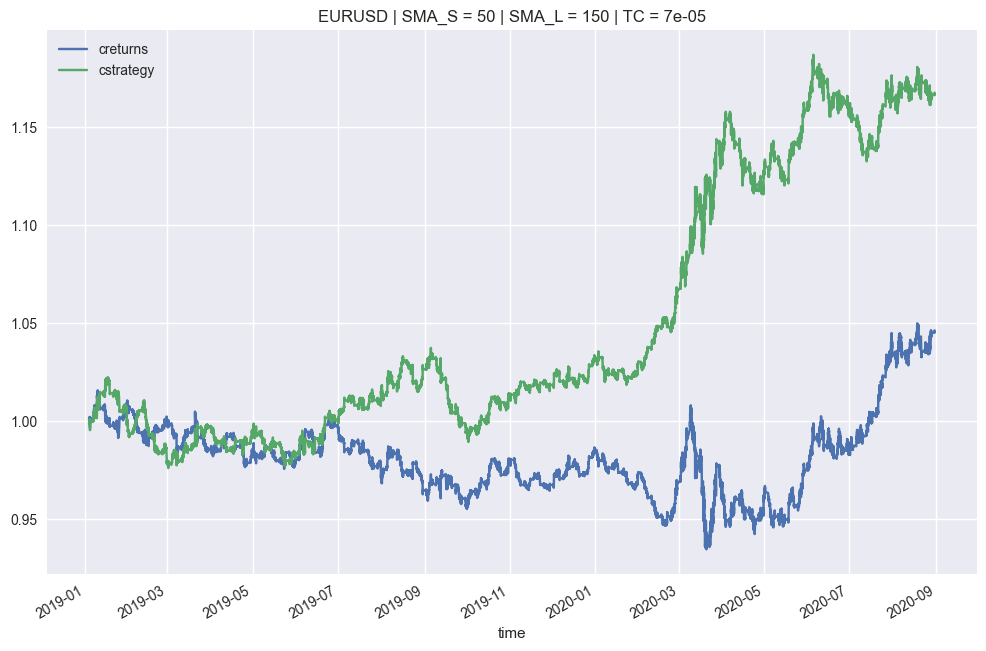

In [10]:
tester.plot_results()

In [11]:
tester.results

,price,returns,SMA_S,SMA_L,position,strategy,trades,creturns,cstrategy
time,,,,,,,,,
2019-01-04 00:00:00+00:00,1.139460,0.000391,1.138221,1.139135,-1,-0.000391,0.0,1.000391,0.999609
2019-01-04 00:20:00+00:00,1.139845,0.000338,1.138279,1.139091,-1,-0.000338,0.0,1.000729,0.999272
2019-01-04 00:40:00+00:00,1.140560,0.000627,1.138358,1.139052,-1,-0.000627,0.0,1.001356,0.998645
2019-01-04 01:00:00+00:00,1.140545,-0.000013,1.138418,1.139011,-1,0.000013,0.0,1.001343,0.998659
2019-01-04 01:20:00+00:00,1.140750,0.000180,1.138473,1.138972,-1,-0.000180,0.0,1.001523,0.998479
...,...,...,...,...,...,...,...,...,...
2020-08-30 22:20:00+00:00,1.190970,0.000382,1.189587,1.185039,1,0.000382,0.0,1.045614,1.166695
2020-08-30 22:40:00+00:00,1.190860,-0.000092,1.189669,1.185091,1,-0.000092,0.0,1.045517,1.166587
2020-08-30 23:00:00+00:00,1.190690,-0.000143,1.189746,1.185141,1,-0.000143,0.0,1.045368,1.166421


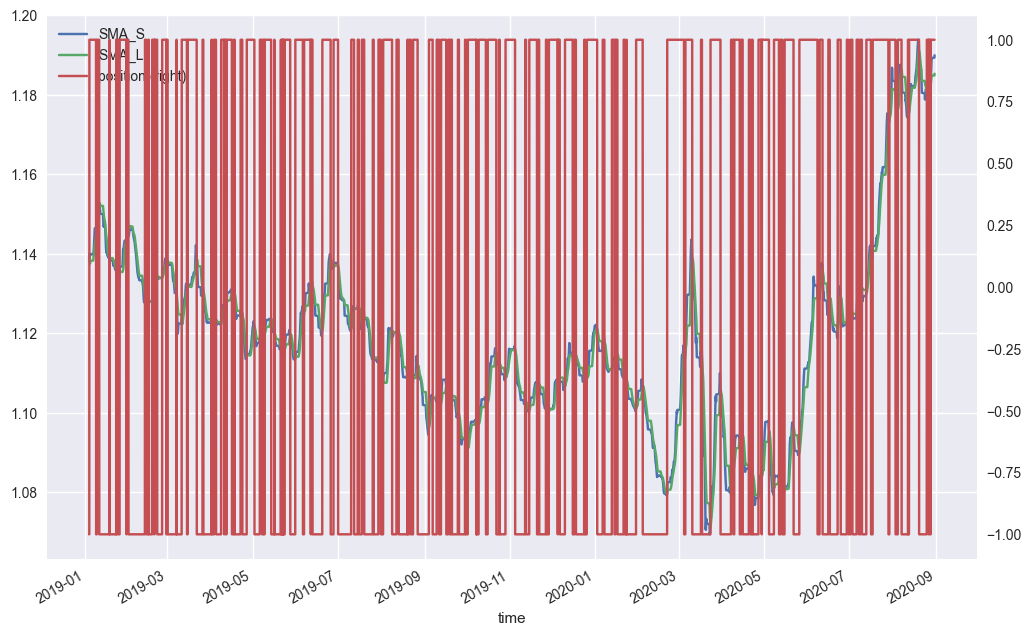

In [12]:
tester.results[["SMA_S", "SMA_L", "position"]].plot(secondary_y = "position", figsize = (12, 8))
plt.show()

In [13]:
tester.results.trades.value_counts()

trades
0.0    30650
2.0      217
Name: count, dtype: int64

## Mean Reversion Strategy

In [14]:
import MeanRevBacktester as MeanRev

In [15]:
start = "2019-01-01"
end = "2020-08-30"
symbol = "EURUSD"
sma = 75
dev = 3
tc = 0.00007

In [16]:
tester2 = MeanRev.MeanRevBacktester(symbol, sma, dev, start, end, tc)

In [17]:
tester2

MeanRevBacktester(symbol = EURUSD, SMA = 75, dev = 3, start = 2019-01-01, end = 2020-08-30)

In [18]:
tester2.data

,price,returns,SMA,Lower,Upper
time,,,,,
2019-01-01 22:00:00+00:00,1.146320,NaN,NaN,NaN,NaN
2019-01-01 22:20:00+00:00,1.146455,0.000118,NaN,NaN,NaN
2019-01-01 22:40:00+00:00,1.146410,-0.000039,NaN,NaN,NaN
2019-01-01 23:00:00+00:00,1.146670,0.000227,NaN,NaN,NaN
2019-01-01 23:20:00+00:00,1.146630,-0.000035,NaN,NaN,NaN
...,...,...,...,...,...
2020-08-30 22:20:00+00:00,1.190970,0.000382,1.187613,1.178012,1.197214
2020-08-30 22:40:00+00:00,1.190860,-0.000092,1.187729,1.178260,1.197199
2020-08-30 23:00:00+00:00,1.190690,-0.000143,1.187841,1.178514,1.197169


In [19]:
tester2.test_strategy()

(1.013488, -0.038307)

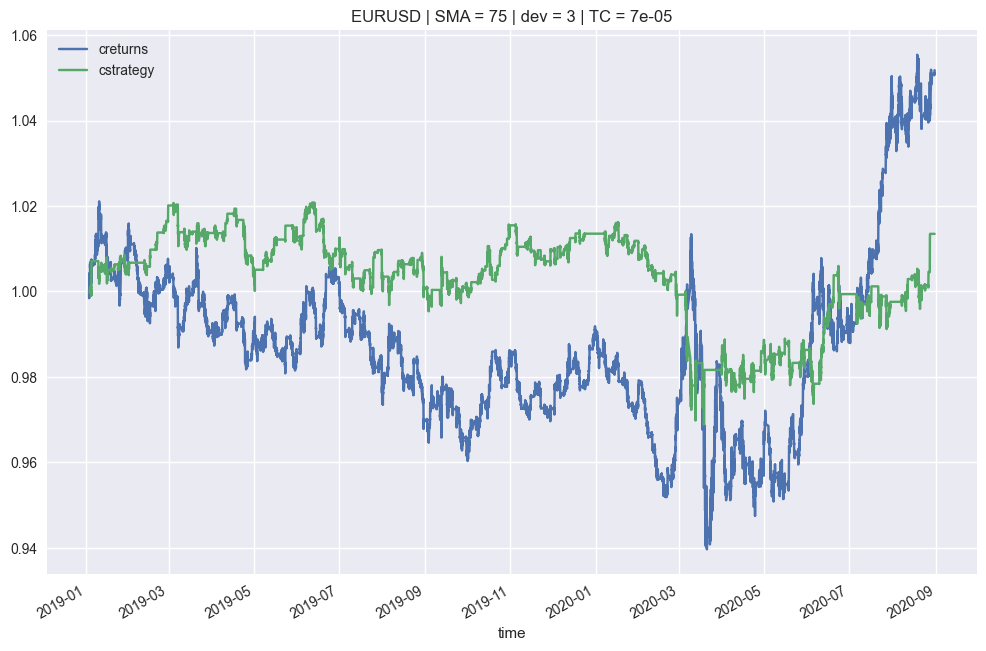

In [20]:
tester2.plot_results()

In [21]:
tester2.results

,price,returns,SMA,Lower,Upper,distance,position,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,
2019-01-02 23:00:00+00:00,1.133395,0.000322,1.140925,1.124549,1.157301,-0.007530,0.0,0.0,0.0,1.000322,1.000000
2019-01-02 23:20:00+00:00,1.133210,-0.000163,1.140748,1.124273,1.157223,-0.007538,0.0,-0.0,0.0,1.000159,1.000000
2019-01-02 23:40:00+00:00,1.131250,-0.001731,1.140546,1.123869,1.157223,-0.009296,0.0,-0.0,0.0,0.998429,1.000000
2019-01-03 00:00:00+00:00,1.133775,0.002230,1.140374,1.123675,1.157074,-0.006599,0.0,0.0,0.0,1.000658,1.000000
2019-01-03 00:20:00+00:00,1.133955,0.000159,1.140205,1.123506,1.156905,-0.006250,0.0,0.0,0.0,1.000816,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 22:20:00+00:00,1.190970,0.000382,1.187613,1.178012,1.197214,0.003357,0.0,0.0,0.0,1.051137,1.013488
2020-08-30 22:40:00+00:00,1.190860,-0.000092,1.187729,1.178260,1.197199,0.003131,0.0,-0.0,0.0,1.051040,1.013488
2020-08-30 23:00:00+00:00,1.190690,-0.000143,1.187841,1.178514,1.197169,0.002849,0.0,-0.0,0.0,1.050890,1.013488


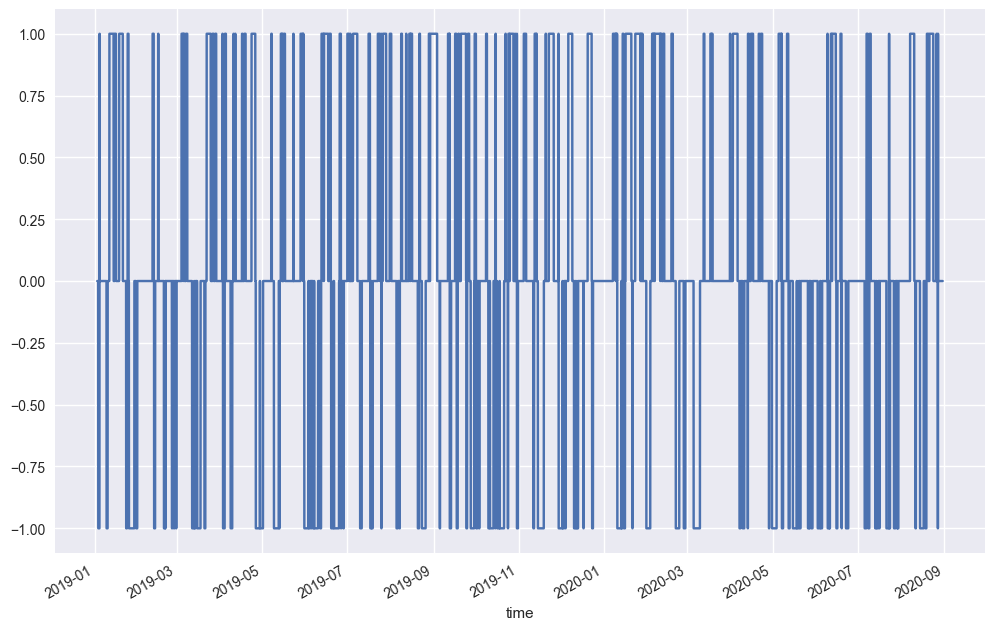

In [22]:
tester2.results.position.plot(figsize = (12, 8))
plt.show()

In [23]:
tester2.results.trades.value_counts()

trades
0.0    30520
1.0      422
Name: count, dtype: int64

## Combining both Strategies

__Goal:__ Stronger Signals / Identify Weak Signals

__Two different Methods:__

__Unanimous Signals__ (pro: strong signals | con: restrictive / doesn´t work with too many Indicators)
- Go Long if all Signals are long
- Go Short if all Signals are short
- Go Neutral if Signals are nonunanimous 

__Majority / Tendency__ (pro: can be customized | con: more trades / weaker signals)
- Go Long if at least two Signals are long (3 Signals Case)
- Go Long if > [50%] of Signals are long and < [25%] of Signals are short (many Signals Case)

In [24]:
tester.results

,price,returns,SMA_S,SMA_L,position,strategy,trades,creturns,cstrategy
time,,,,,,,,,
2019-01-04 00:00:00+00:00,1.139460,0.000391,1.138221,1.139135,-1,-0.000391,0.0,1.000391,0.999609
2019-01-04 00:20:00+00:00,1.139845,0.000338,1.138279,1.139091,-1,-0.000338,0.0,1.000729,0.999272
2019-01-04 00:40:00+00:00,1.140560,0.000627,1.138358,1.139052,-1,-0.000627,0.0,1.001356,0.998645
2019-01-04 01:00:00+00:00,1.140545,-0.000013,1.138418,1.139011,-1,0.000013,0.0,1.001343,0.998659
2019-01-04 01:20:00+00:00,1.140750,0.000180,1.138473,1.138972,-1,-0.000180,0.0,1.001523,0.998479
...,...,...,...,...,...,...,...,...,...
2020-08-30 22:20:00+00:00,1.190970,0.000382,1.189587,1.185039,1,0.000382,0.0,1.045614,1.166695
2020-08-30 22:40:00+00:00,1.190860,-0.000092,1.189669,1.185091,1,-0.000092,0.0,1.045517,1.166587
2020-08-30 23:00:00+00:00,1.190690,-0.000143,1.189746,1.185141,1,-0.000143,0.0,1.045368,1.166421


In [25]:
tester2.results

,price,returns,SMA,Lower,Upper,distance,position,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,
2019-01-02 23:00:00+00:00,1.133395,0.000322,1.140925,1.124549,1.157301,-0.007530,0.0,0.0,0.0,1.000322,1.000000
2019-01-02 23:20:00+00:00,1.133210,-0.000163,1.140748,1.124273,1.157223,-0.007538,0.0,-0.0,0.0,1.000159,1.000000
2019-01-02 23:40:00+00:00,1.131250,-0.001731,1.140546,1.123869,1.157223,-0.009296,0.0,-0.0,0.0,0.998429,1.000000
2019-01-03 00:00:00+00:00,1.133775,0.002230,1.140374,1.123675,1.157074,-0.006599,0.0,0.0,0.0,1.000658,1.000000
2019-01-03 00:20:00+00:00,1.133955,0.000159,1.140205,1.123506,1.156905,-0.006250,0.0,0.0,0.0,1.000816,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 22:20:00+00:00,1.190970,0.000382,1.187613,1.178012,1.197214,0.003357,0.0,0.0,0.0,1.051137,1.013488
2020-08-30 22:40:00+00:00,1.190860,-0.000092,1.187729,1.178260,1.197199,0.003131,0.0,-0.0,0.0,1.051040,1.013488
2020-08-30 23:00:00+00:00,1.190690,-0.000143,1.187841,1.178514,1.197169,0.002849,0.0,-0.0,0.0,1.050890,1.013488


In [26]:
comb = tester.results.loc[:, ["returns", "position"]].copy()

In [27]:
comb

,returns,position
time,,
2019-01-04 00:00:00+00:00,0.000391,-1
2019-01-04 00:20:00+00:00,0.000338,-1
2019-01-04 00:40:00+00:00,0.000627,-1
2019-01-04 01:00:00+00:00,-0.000013,-1
2019-01-04 01:20:00+00:00,0.000180,-1
...,...,...
2020-08-30 22:20:00+00:00,0.000382,1
2020-08-30 22:40:00+00:00,-0.000092,1
2020-08-30 23:00:00+00:00,-0.000143,1


In [28]:
comb.rename(columns = {"position":"position_SMA"}, inplace = True)

In [29]:
comb["position_MR"] = tester2.results.position.astype("int")

In [30]:
comb

,returns,position_SMA,position_MR
time,,,
2019-01-04 00:00:00+00:00,0.000391,-1,-1
2019-01-04 00:20:00+00:00,0.000338,-1,-1
2019-01-04 00:40:00+00:00,0.000627,-1,-1
2019-01-04 01:00:00+00:00,-0.000013,-1,-1
2019-01-04 01:20:00+00:00,0.000180,-1,-1
...,...,...,...
2020-08-30 22:20:00+00:00,0.000382,1,0
2020-08-30 22:40:00+00:00,-0.000092,1,0
2020-08-30 23:00:00+00:00,-0.000143,1,0


__Alternative 1: Unanimous Signals__

In [ ]:
#comb["position_comb"] = np.where(comb.position_MR == comb.position_SMA, comb.position_MR, 0)

__Alternative 2: Majority / Tendency__

In [31]:
comb["position_comb"] = np.sign(comb.position_MR + comb.position_SMA)

In [32]:
comb.head(60)

,returns,position_SMA,position_MR,position_comb
time,,,,
2019-01-04 00:00:00+00:00,0.000391,-1,-1,-1
2019-01-04 00:20:00+00:00,0.000338,-1,-1,-1
2019-01-04 00:40:00+00:00,0.000627,-1,-1,-1
2019-01-04 01:00:00+00:00,-0.000013,-1,-1,-1
2019-01-04 01:20:00+00:00,0.000180,-1,-1,-1
2019-01-04 01:40:00+00:00,-0.000298,-1,-1,-1
2019-01-04 02:00:00+00:00,0.000241,-1,-1,-1
2019-01-04 02:20:00+00:00,-0.000487,-1,-1,-1
2019-01-04 02:40:00+00:00,-0.000329,-1,-1,-1


In [33]:
comb.position_comb.value_counts()

position_comb
 0    10636
-1    10215
 1    10016
Name: count, dtype: int64

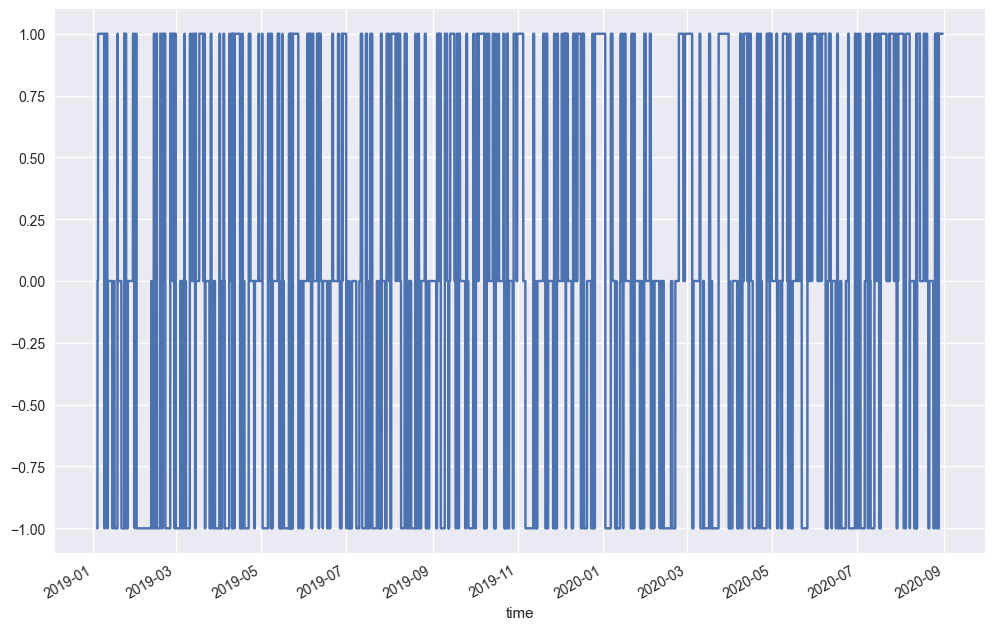

In [34]:
comb.position_comb.plot(figsize = (12, 8))
plt.show()

## Taking into account busy trading hours

In [35]:
comb

,returns,position_SMA,position_MR,position_comb
time,,,,
2019-01-04 00:00:00+00:00,0.000391,-1,-1,-1
2019-01-04 00:20:00+00:00,0.000338,-1,-1,-1
2019-01-04 00:40:00+00:00,0.000627,-1,-1,-1
2019-01-04 01:00:00+00:00,-0.000013,-1,-1,-1
2019-01-04 01:20:00+00:00,0.000180,-1,-1,-1
...,...,...,...,...
2020-08-30 22:20:00+00:00,0.000382,1,0,1
2020-08-30 22:40:00+00:00,-0.000092,1,0,1
2020-08-30 23:00:00+00:00,-0.000143,1,0,1


In [36]:
comb["NYTime"] = comb.index.tz_convert("America/New_York")
comb["hour"] = comb.NYTime.dt.hour

In [37]:
comb.position_comb = np.where(comb.hour.between(2, 12), comb.position_comb, 0)

In [38]:
comb.position_comb.value_counts()

position_comb
 0    20862
 1     5029
-1     4976
Name: count, dtype: int64

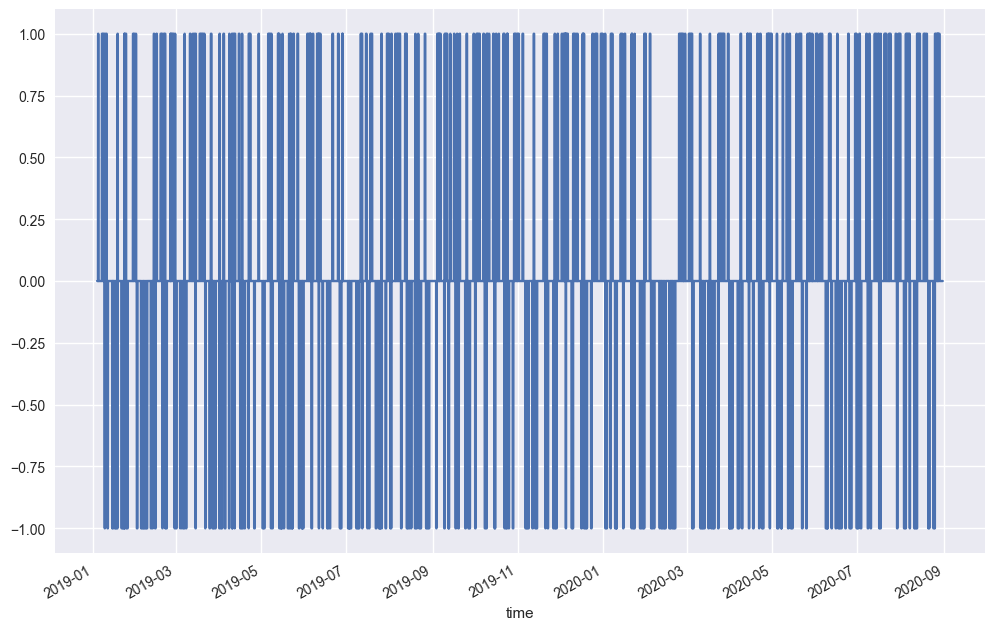

In [39]:
comb.position_comb.plot(figsize = (12, 8))
plt.show()

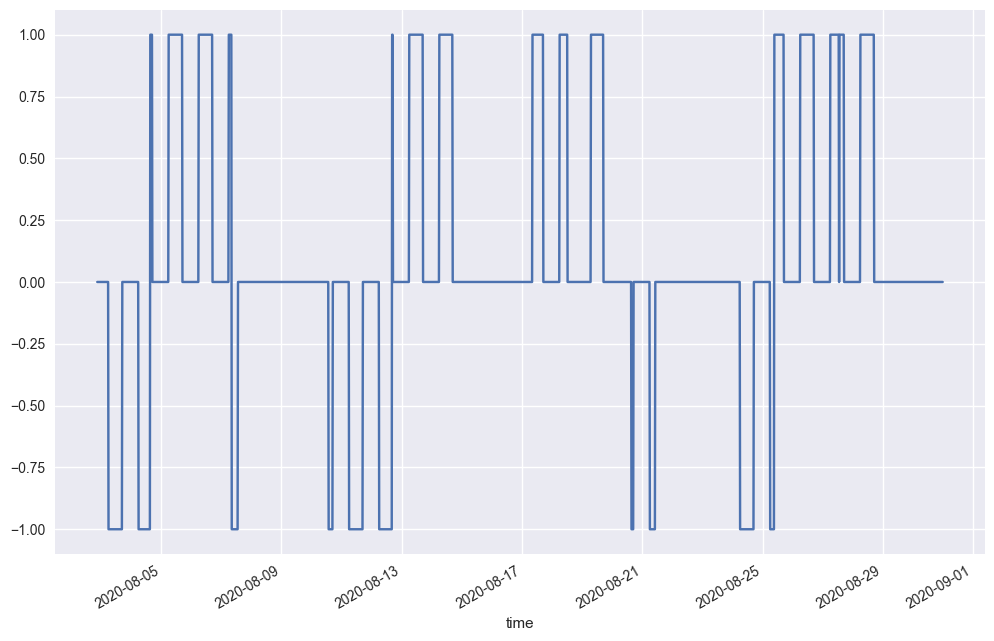

In [40]:
comb.position_comb.loc["2020-08"].plot(figsize = (12, 8))
plt.show()

## Backtesting

In [41]:
comb

,returns,position_SMA,position_MR,position_comb,NYTime,hour
time,,,,,,
2019-01-04 00:00:00+00:00,0.000391,-1,-1,0,2019-01-03 19:00:00-05:00,19
2019-01-04 00:20:00+00:00,0.000338,-1,-1,0,2019-01-03 19:20:00-05:00,19
2019-01-04 00:40:00+00:00,0.000627,-1,-1,0,2019-01-03 19:40:00-05:00,19
2019-01-04 01:00:00+00:00,-0.000013,-1,-1,0,2019-01-03 20:00:00-05:00,20
2019-01-04 01:20:00+00:00,0.000180,-1,-1,0,2019-01-03 20:20:00-05:00,20
...,...,...,...,...,...,...
2020-08-30 22:20:00+00:00,0.000382,1,0,0,2020-08-30 18:20:00-04:00,18
2020-08-30 22:40:00+00:00,-0.000092,1,0,0,2020-08-30 18:40:00-04:00,18
2020-08-30 23:00:00+00:00,-0.000143,1,0,0,2020-08-30 19:00:00-04:00,19


In [42]:
comb["strategy"] = comb["position_comb"].shift(1) * comb["returns"]

In [43]:
comb.dropna(inplace=True)

In [44]:
comb["trades"] = comb.position_comb.diff().fillna(0).abs()

In [45]:
tc = 0.000059

In [46]:
comb.strategy = comb.strategy - comb.trades * tc

In [47]:
comb["creturns"] = comb["returns"].cumsum().apply(np.exp)
comb["cstrategy"] = comb["strategy"].cumsum().apply(np.exp)

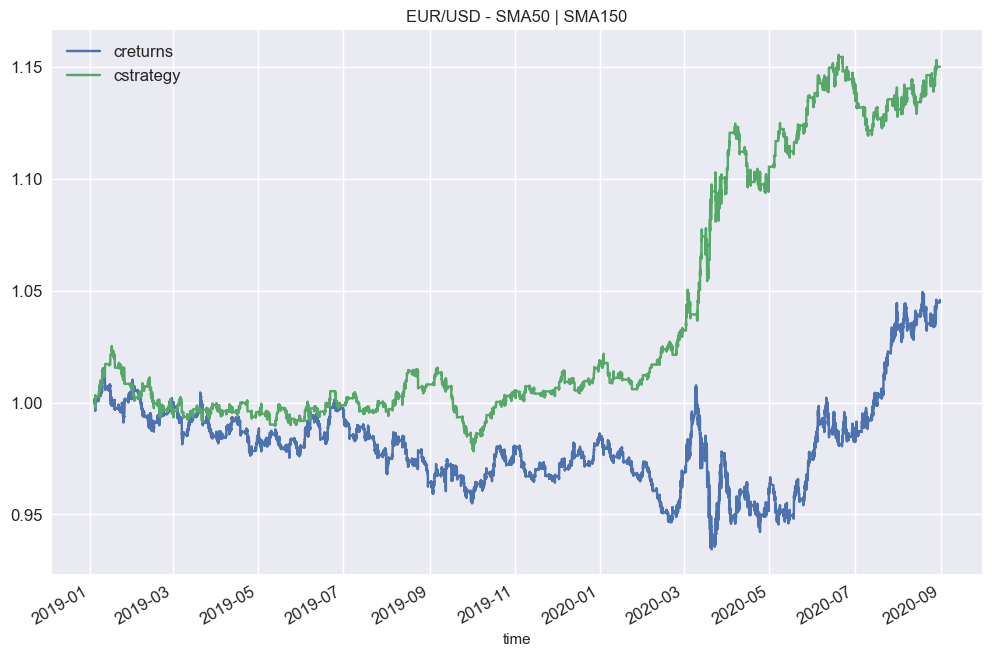

In [48]:
comb[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [49]:
comb.trades.value_counts()

trades
0.0    29980
1.0      830
2.0       56
Name: count, dtype: int64

## Strategy Optimization

In [50]:
import SMABacktester as SMA
import MeanRevBacktester as MeanRev

In [51]:
def optimal_strategy(parameters):
    
    start = "2019-01-01"
    end = "2020-08-30"
    symbol = "EURUSD"
    tc = 0.000059
    
    # SMA
    tester1 = SMA.SMABacktester(symbol, int(parameters[0]), int(parameters[1]), start, end, tc)
    tester1.test_strategy()
    
    # Bollinger
    tester2 = MeanRev.MeanRevBacktester(symbol,  int(parameters[2]),  int(parameters[3]), start, end, tc)
    tester2.test_strategy()
    
    # Create comb
    comb = tester1.results.loc[:, ["returns", "position"]].copy()
    comb.rename(columns = {"position":"position_SMA"}, inplace = True)
    comb["position_MR"] = tester2.results.position
    
    # 2 Methods
    #comb["position_comb"] = np.where(comb.position_MR == comb.position_SMA, comb.position_MR, 0) 
    comb["position_comb"] = np.sign(comb.position_MR + comb.position_SMA)
    
    # Busy Hours
    comb["NYTime"] = comb.index.tz_convert("America/New_York")
    comb["hour"] = comb.NYTime.dt.hour
    comb.position_comb = np.where(comb.hour.between(2, 12), comb.position_comb, 0)
    
    # Backtest
    comb["strategy"] = comb["position_comb"].shift(1) * comb["returns"]
    comb.dropna(inplace=True)
    comb["trades"] = comb.position_comb.diff().fillna(0).abs()
    comb.strategy = comb.strategy - comb.trades * tc
    comb["creturns"] = comb["returns"].cumsum().apply(np.exp)
    comb["cstrategy"] = comb["strategy"].cumsum().apply(np.exp)
    
    return -comb["cstrategy"].iloc[-1] # negative absolute performance to be minimized

In [52]:
optimal_strategy((50, 150, 75, 3))

-1.150153534460439

In [53]:
from scipy.optimize import minimize

In [54]:
bnds =  ((25, 75), (100, 200), (50, 100), (1, 5))
bnds

((25, 75), (100, 200), (50, 100), (1, 5))

In [55]:
start_par = (50, 150, 75, 3)

In [56]:
#run optimization based on function to be minimized, starting with start parameters
opts = minimize(optimal_strategy, start_par, method = "Powell" , bounds = bnds)

KeyboardInterrupt: 

In [ ]:
opts

In [ ]:
optimal_strategy(opts.x)